In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sigpy as sp
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'

figname = '02_basis_balancing.png'

In [2]:
bal = np.load("../data/testing/case001/ref_6min.npy")
ubal = sp.fft(bal, axes=(-1,))
ubal /= np.linalg.norm(ubal[..., 0])
bal /= np.linalg.norm(bal[..., 0])

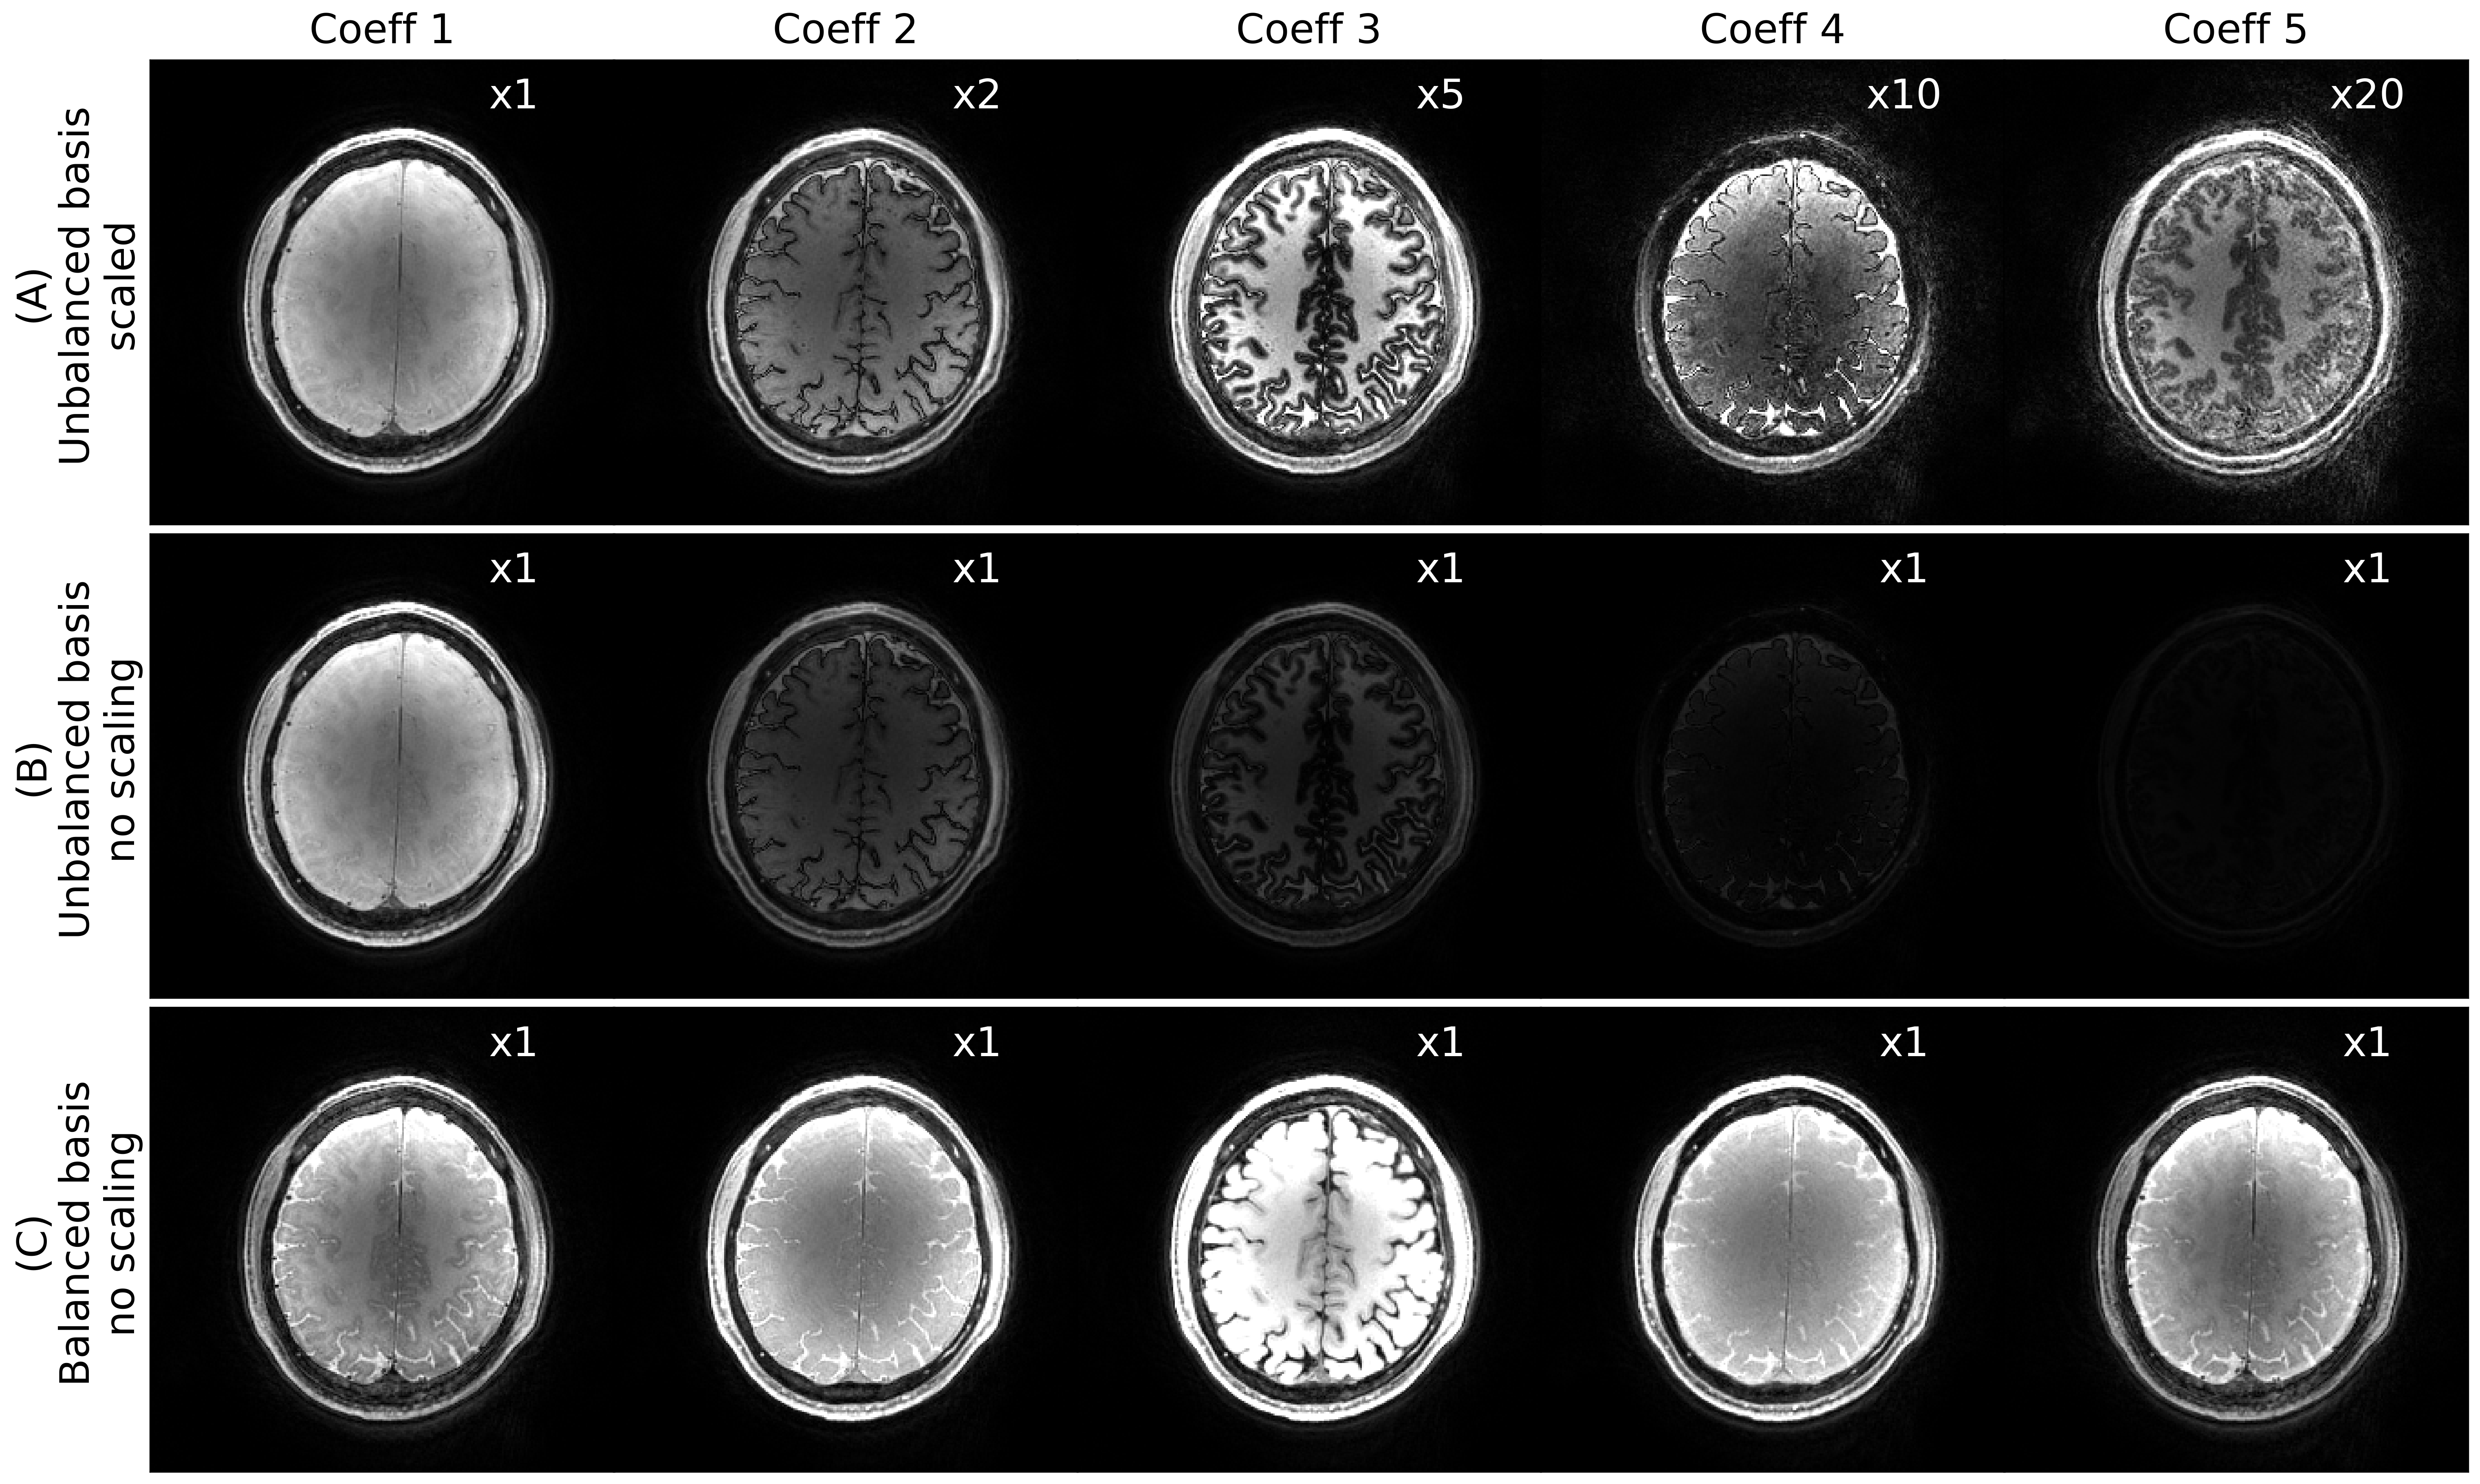

In [3]:
vmax = np.max(np.abs(ubal).ravel())*0.3
scales = [1, 2, 5, 10, 20]
tk = bal.shape[-1]

fig, axs = plt.subplots(3, tk, figsize=(tk * 5, 15), dpi=300)

def helper(ax, arr):
    tmp = np.abs(arr)
    ax.imshow(tmp, cmap="gray", vmin=0, vmax=vmax)
    
for k in range(tk):
    helper(axs[0][k], scales[k]*ubal[:, ::-1, 180, k].T)
    helper(axs[1][k], ubal[:, ::-1, 180, k].T)
    helper(axs[2][k], bal[:, ::-1, 180, k].T)    
    axs[0][k].text(200, 20, f'x{scales[k]}', horizontalalignment='center', verticalalignment='center', fontsize = 24, color='w')
    axs[1][k].text(200, 20, f'x1', horizontalalignment='center', verticalalignment='center', fontsize = 24, color='w')
    axs[2][k].text(200, 20, f'x1', horizontalalignment='center', verticalalignment='center', fontsize = 24, color='w')
    
    axs[0][k].set_title("Coeff %d" % (k + 1), fontsize=24, pad=10)

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

axs[0][0].set_ylabel("(A)\n Unbalanced basis\n scaled", fontsize=24)
axs[1][0].set_ylabel("(B)\n Unbalanced basis\n no scaling", fontsize=24)
axs[2][0].set_ylabel("(C)\n Balanced basis\n no scaling", fontsize=24)

plt.subplots_adjust(wspace=-0.1, hspace=0.02)
plt.savefig(figname)